<a href="https://colab.research.google.com/github/KhaSab5292/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import  ttest_ind

**1.**

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 20:21:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-16 20:21:25 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [5]:
df = pd.read_csv('house-votes-84.data', header = None,
                names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [9]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [11]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']
dem.shape, rep.shape

((267, 17), (168, 17))

In [12]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [13]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [18]:
df.isnull().sum() 

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

**2.** On average, Democrats support this issue more than Republicans. 

In [29]:
dem['handicapped-infants'].mean(), rep['handicapped-infants'].mean()

(0.6046511627906976, 0.18787878787878787)

In [30]:
ttest_ind(dem['handicapped-infants'], rep['handicapped-infants'], nan_policy = 'omit')

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)

**3.**  On average, Republicans support this issue more than Democrats. 

In [26]:
dem['religious-groups'].mean(), rep['religious-groups'].mean()

(0.47674418604651164, 0.8975903614457831)

In [52]:
ttest_ind(dem['religious-groups'], rep['religious-groups'], nan_policy = 'omit')

Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)

**4.**  p-value for water project support is greater than 0.1.  This implies that Democrats and Republicans don't seem that different regarding this issue.

In [62]:
dem['water-project'].mean(), rep['water-project'].mean()

(0.502092050209205, 0.5067567567567568)

In [63]:
ttest_ind(dem['water-project'], rep['water-project'], nan_policy = 'omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

**Visualization**

In [76]:
dem['handicapped-infants'].describe(), rep['handicapped-infants'].describe()

(count    258.000000
 mean       0.604651
 std        0.489876
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: handicapped-infants, dtype: float64, count    165.000000
 mean       0.187879
 std        0.391804
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: handicapped-infants, dtype: float64)

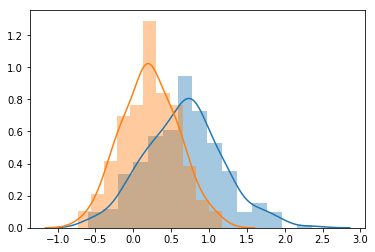

In [112]:
subsetdem = np.random.normal(0.604651, 0.489876, 258)
subsetrep = np.random.normal(0.187879, 0.391804, 165)

for sample in [subsetdem, subsetrep]:
  sns.distplot(sample)

In [98]:
dem['religious-groups'].describe(), rep['religious-groups'].describe()

(count    258.000000
 mean       0.476744
 std        0.500430
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: religious-groups, dtype: float64, count    166.000000
 mean       0.897590
 std        0.304104
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: religious-groups, dtype: float64)

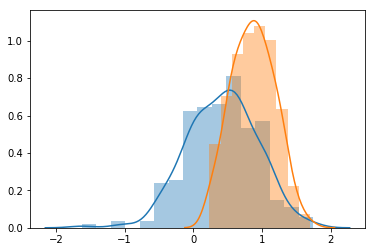

In [106]:
subsetdem = np.random.normal(0.476744, 0.500430, 258)
subsetrep = np.random.normal(0.897590, 0.304104, 165)

for sample in [subsetdem, subsetrep]:
  sns.distplot(sample)

In [101]:
dem['water-project'].describe(), rep['water-project'].describe()

(count    239.000000
 mean       0.502092
 std        0.501045
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: water-project, dtype: float64, count    148.000000
 mean       0.506757
 std        0.501652
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: water-project, dtype: float64)

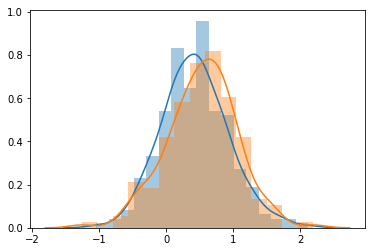

In [104]:
subsetdem = np.random.normal(0.502092, 0.501045, 258)
subsetrep = np.random.normal(0.506757, 0.501652, 165)

for sample in [subsetdem, subsetrep]:
  sns.distplot(sample)